In [14]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [2]:
#data=data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


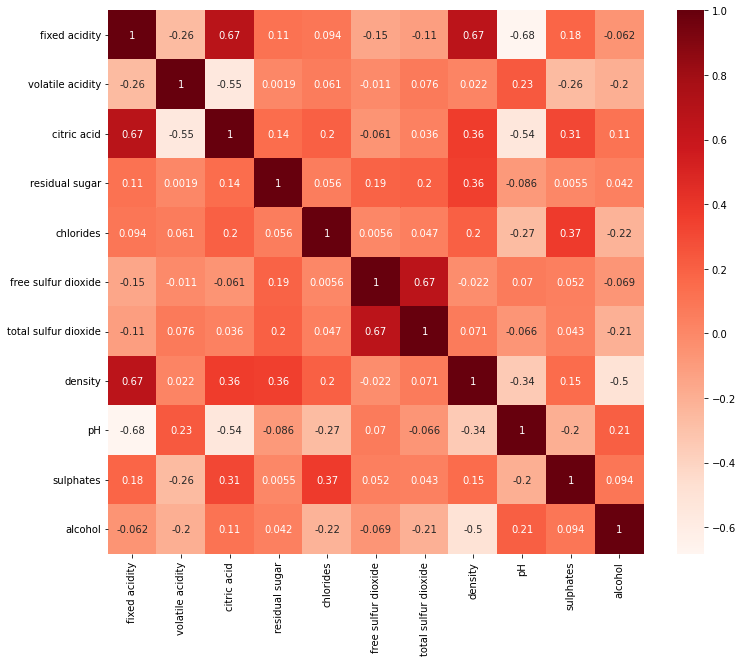

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#Using general covariance
#cov = df.covar()
#sns.heatmap(cov, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
X = data.drop("quality",1) #Feature Matrix
y = data["quality"] #Target Variable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [5]:
from sklearn.feature_selection import mutual_info_classif as MIC #Mutual Inf
mi_score = MIC(X,y)
print(mi_score)

[0.02937229 0.07728051 0.0274802  0.01843734 0.01865238 0.01000107
 0.05040724 0.05388347 0.         0.07937654 0.138098  ]


In [6]:
from sklearn.model_selection import train_test_split as tts
X_train_1,X_test_1,y_train,y_test = tts(
X,y
,random_state=0
,stratify=y
)

In [7]:
from sklearn.tree import DecisionTreeClassifier as DTC
model_1 = DTC().fit(X_train_1,y_train)

In [8]:
score_1 = model_1.score(X_test_1,y_test)
score_1

0.7

In [9]:
data=data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

In [10]:
X = data.drop("alcohol",1) #Feature Matrix
y = data["alcohol"] #Target Variable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [15]:
### RFE: Recurrsive Feature Elimination
#no of features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
nof_list=np.arange(1,13)
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
    model = LinearRegression()
    rfe = RFE(model)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
      high_score = score
      nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.478367


In [12]:
### Backward Elimination
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                   6.157985e-298
fixed acidity           7.629681e-123
volatile acidity         1.638216e-03
citric acid              2.111941e-09
residual sugar          2.754904e-102
chlorides                2.267806e-04
free sulfur dioxide      2.975169e-01
total sulfur dioxide     8.681092e-04
density                 2.460787e-294
pH                      7.120112e-111
sulphates                6.438917e-32
dtype: float64

In [16]:
cols = list(X.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['citric acid', 'chlorides', 'density', 'pH', 'sulphates'], dtype='object')
